### Decision Trees

#### Advantages - 

* Intuitive and easy to understand.
* Minimal data preparation required. Meaning that no normalization, standardization etc required.
* The cost of using the tree for inference is logarithmic in the number of data points used to train the tree.
* Speed is good as when we select a particular 'Decision Tree' then the other data points are ignored. So even if the data is too vast then it need not worry about it.

#### Disadvantages - 

* Overfitting
* Prone to errors for imbalanced datasets. This means that if for example, the output column is categorical in nature and the number of 'no' are more than the number of 'yes' then this leads to the imbalanced dataset and so the prediction will not be accurate.
* Underfitting

#### CART - Classification and Regression Trees (Decision trees can be used both for Classification and Regression but mostly they are used for the Classification problems).

#### Entropy - 

* more the uncertainity, more the entropy
* For a 2 class problem (only two classes - Yes or No), the min entropy is 0(where all the outout columns are either no or yes- all no or all yes), and max is 1 when there is equal division of the columns (equal yes and no).
* For a 3 class problem, the min entropy is 0 and max entropy is greater than 1.
* Both log(base 2) and log(base e) can be used to calculate entropy.

* more the knowledge of the dataset, less is the entropy.

* data which has less peak (which is less pointed onthe kde graph) has more entropy

#### Information Gain - 

* Information Gain should be high.
* Information Gain of the highest branch is selected for forming the Decision tree.
* Entropy and Gini are same and both of them should be low
* Entropy is slower than Gini but in certain cases Entropy gives more balanced trees and Gini leads to Overfitting.
* We should calculate both Entropy and Gini and then check which one is good.

In [3]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [9]:
X = iris.data

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
names = iris.target_names

In [15]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
y = iris.target

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [20]:
X_train.shape

(120, 4)

In [21]:
X_test.shape

(30, 4)

In [22]:
y_train.shape

(120,)

In [23]:
y_test.shape

(30,)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf = DecisionTreeClassifier()

In [32]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

* here, we have fit our model

In [28]:
clf

DecisionTreeClassifier()

In [33]:
## now we will predict our model - 

y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score

In [35]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [37]:
precision_score(y_test, y_pred , average='weighted')

0.9481481481481481

* We will now plot the Decision Tree and see how the Decision Tree was build, meaning what all values it took to build a decision tree - 

In [39]:
from sklearn.tree import plot_tree

In [40]:
from matplotlib.pylab import rcParams

In [41]:
rcParams['figure.figsize'] = 80,50

[Text(0.3181818181818182, 0.9285714285714286, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.18181818181818182, 0.6428571428571429, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'X[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'X[1] <= 2.9\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2727272727272727, 0.21428571428571427, 'X[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalu

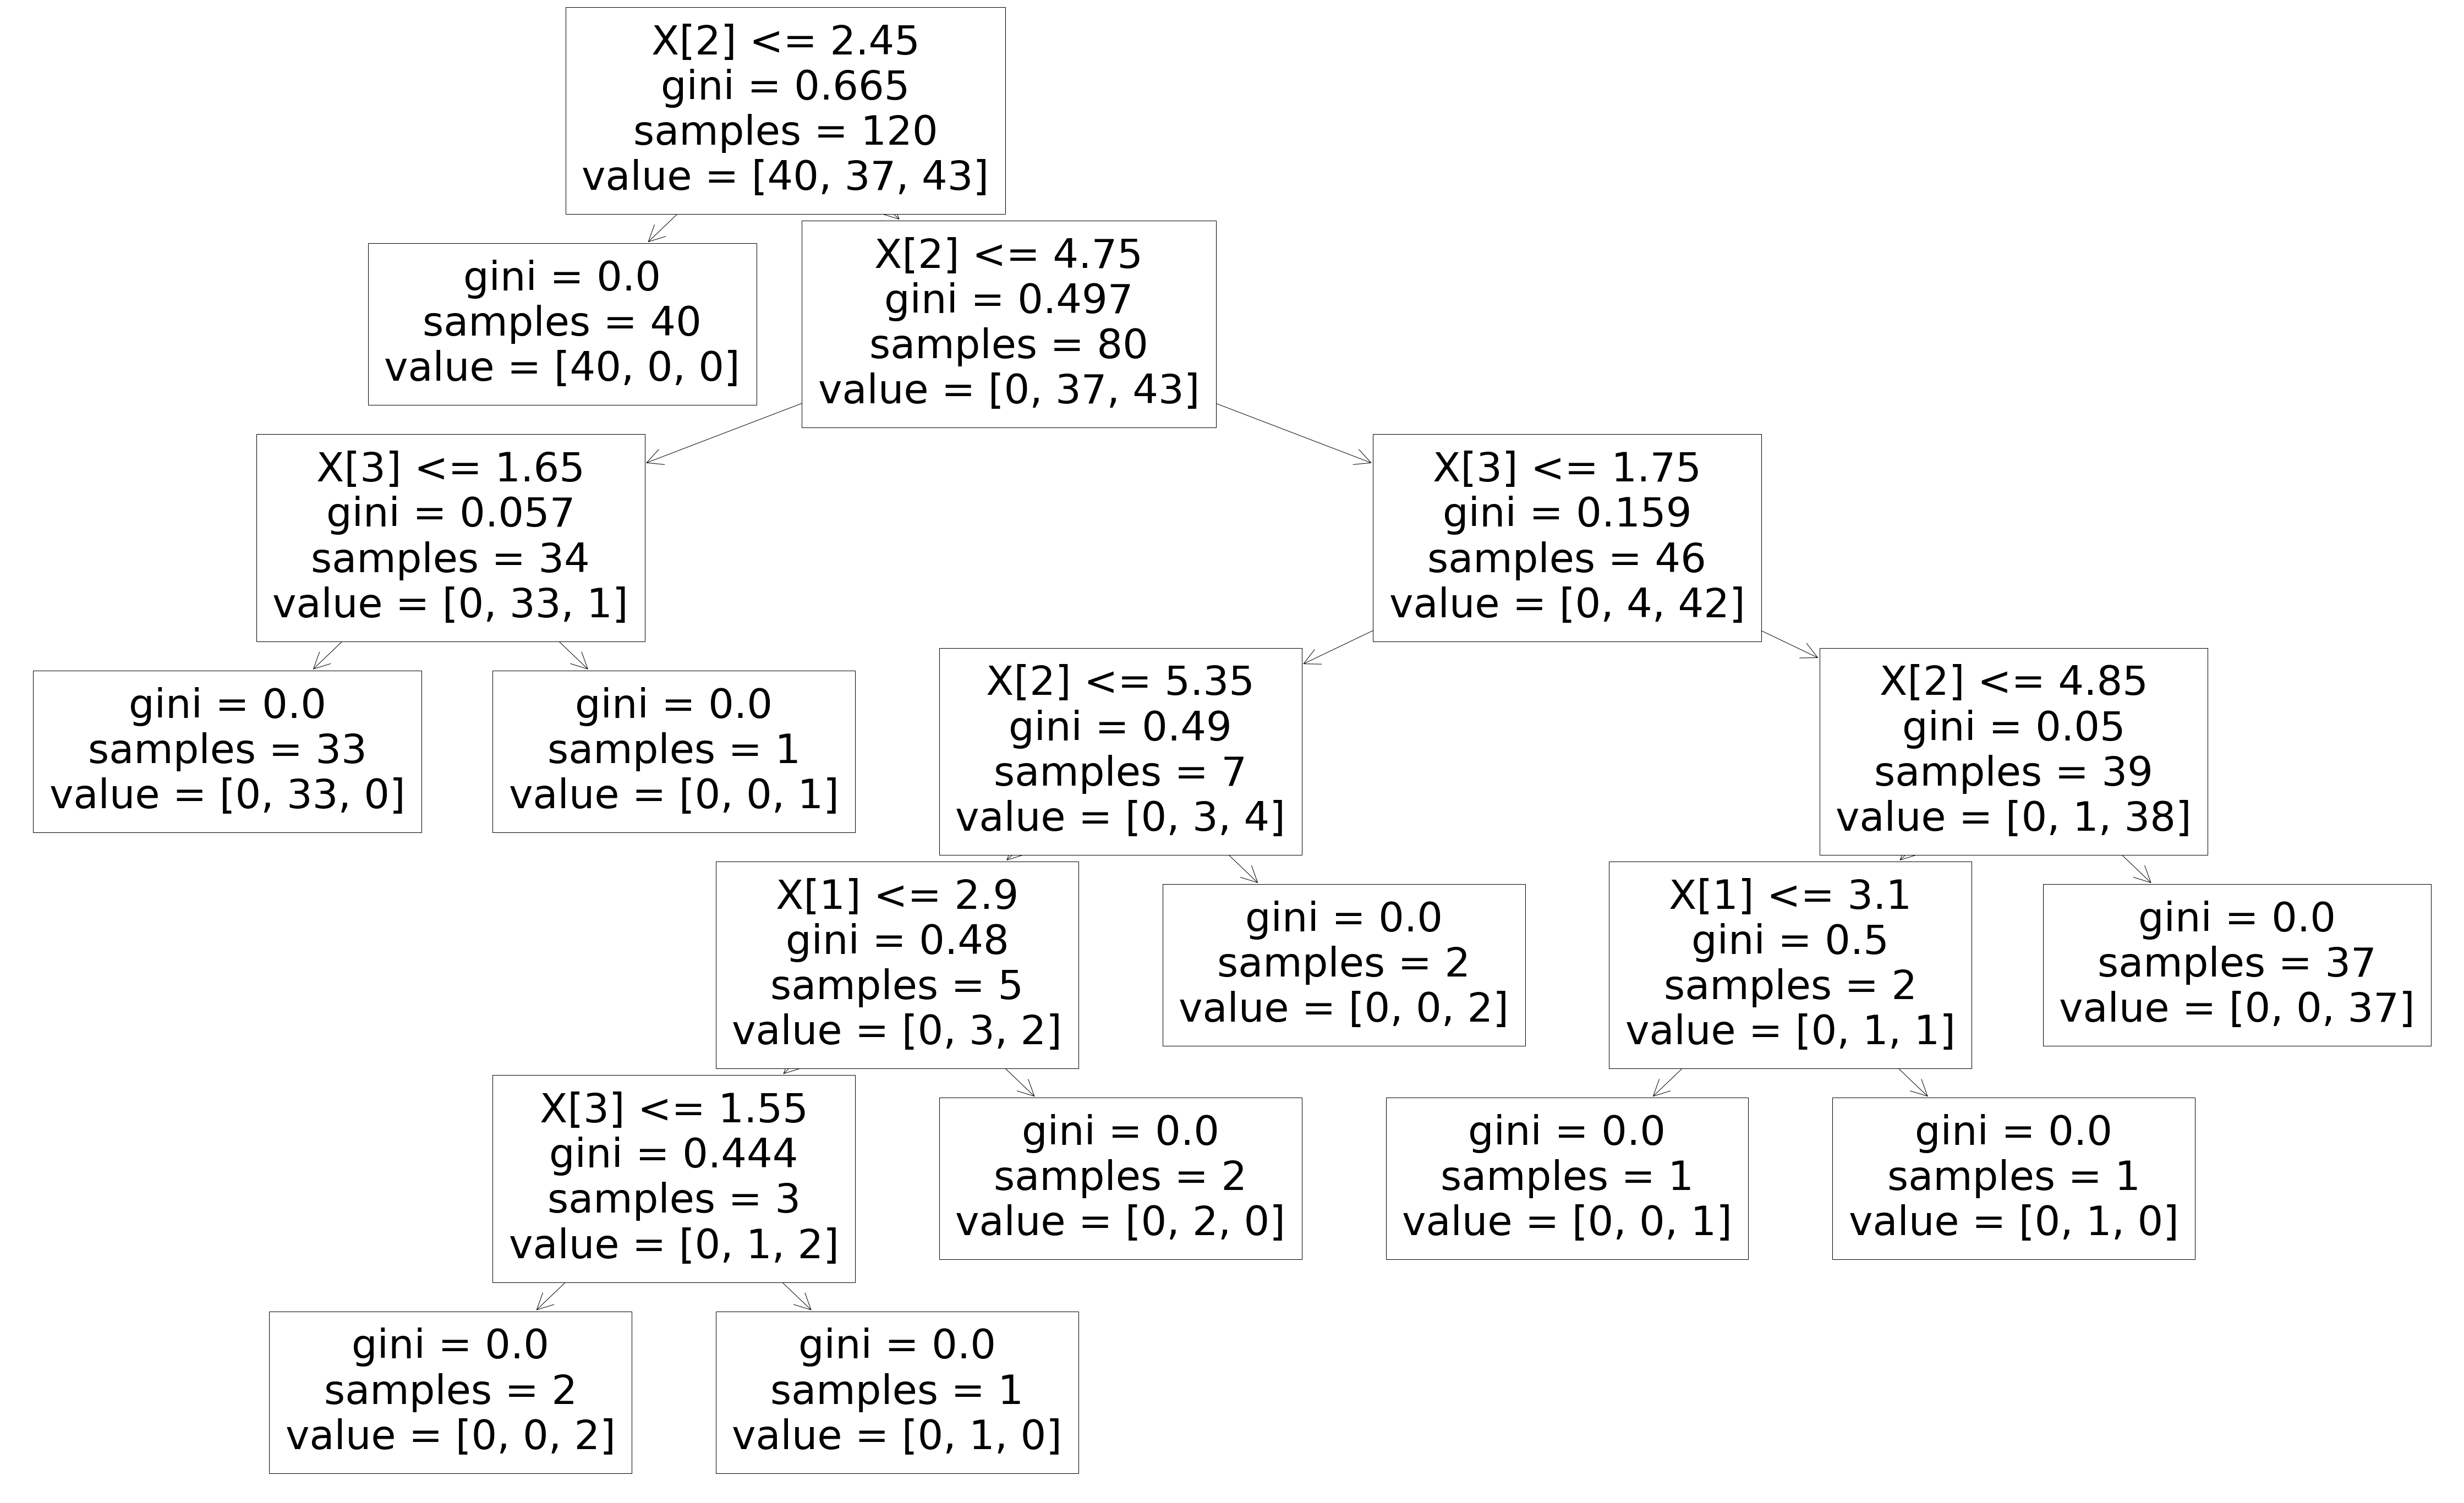

In [43]:
plot_tree(clf)

###### this code is for increasing the size of the Decision Tree diagram

#### Working on the second dataset - 

In [44]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv("Social_Network_Ads.csv")

In [77]:
df.head(2)

User ID Gender  Age  EstimatedSalary  Purchased
0  15624510   Male   19            19000          0
1  15810944   Male   35            20000          0

In [78]:
df['Gender'].replace({'Male' : 0 , 'Female' : 1}, inplace = True)

In [79]:
df.head(1)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0

In [80]:
X1 = df.iloc[:, 1:4]

In [81]:
X1.head(1)

Gender  Age  EstimatedSalary
0       0   19            19000

In [82]:
y1 = df.iloc[:, -1]

In [83]:
y1.head(1)

0    0
Name: Purchased, dtype: int64

In [84]:
X1.shape

(400, 3)

In [85]:
y1.shape

(400,)

In [86]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=10,stratify=y)

In [87]:
X1_train.shape

(320, 3)

In [88]:
df.head(1)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0

In [89]:
y1_train.shape

(320,)

In [90]:
X1_test.shape

(80, 3)

In [91]:
y1_test.shape

(80,)

In [109]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [110]:
clf1 = DecisionTreeClassifier()

In [111]:
clf1.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [112]:
rcParams['figure.figsize'] = 120,50

[Text(0.41983695652173914, 0.9583333333333334, 'X[1] <= 42.5\ngini = 0.459\nsamples = 320\nvalue = [206, 114]'),
 Text(0.2554347826086957, 0.875, 'X[2] <= 90500.0\ngini = 0.277\nsamples = 229\nvalue = [191, 38]'),
 Text(0.11956521739130435, 0.7916666666666666, 'X[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.09782608695652174, 0.7083333333333334, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.14130434782608695, 0.7083333333333334, 'X[2] <= 72500.0\ngini = 0.19\nsamples = 66\nvalue = [59, 7]'),
 Text(0.06521739130434782, 0.625, 'X[1] <= 37.5\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.043478260869565216, 0.5416666666666666, 'X[2] <= 66000.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.021739130434782608, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.06521739130434782, 0.4583333333333333, 'X[2] <= 70500.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.043478260869565216, 0.375, 'gini = 0.0\nsamples = 1\n

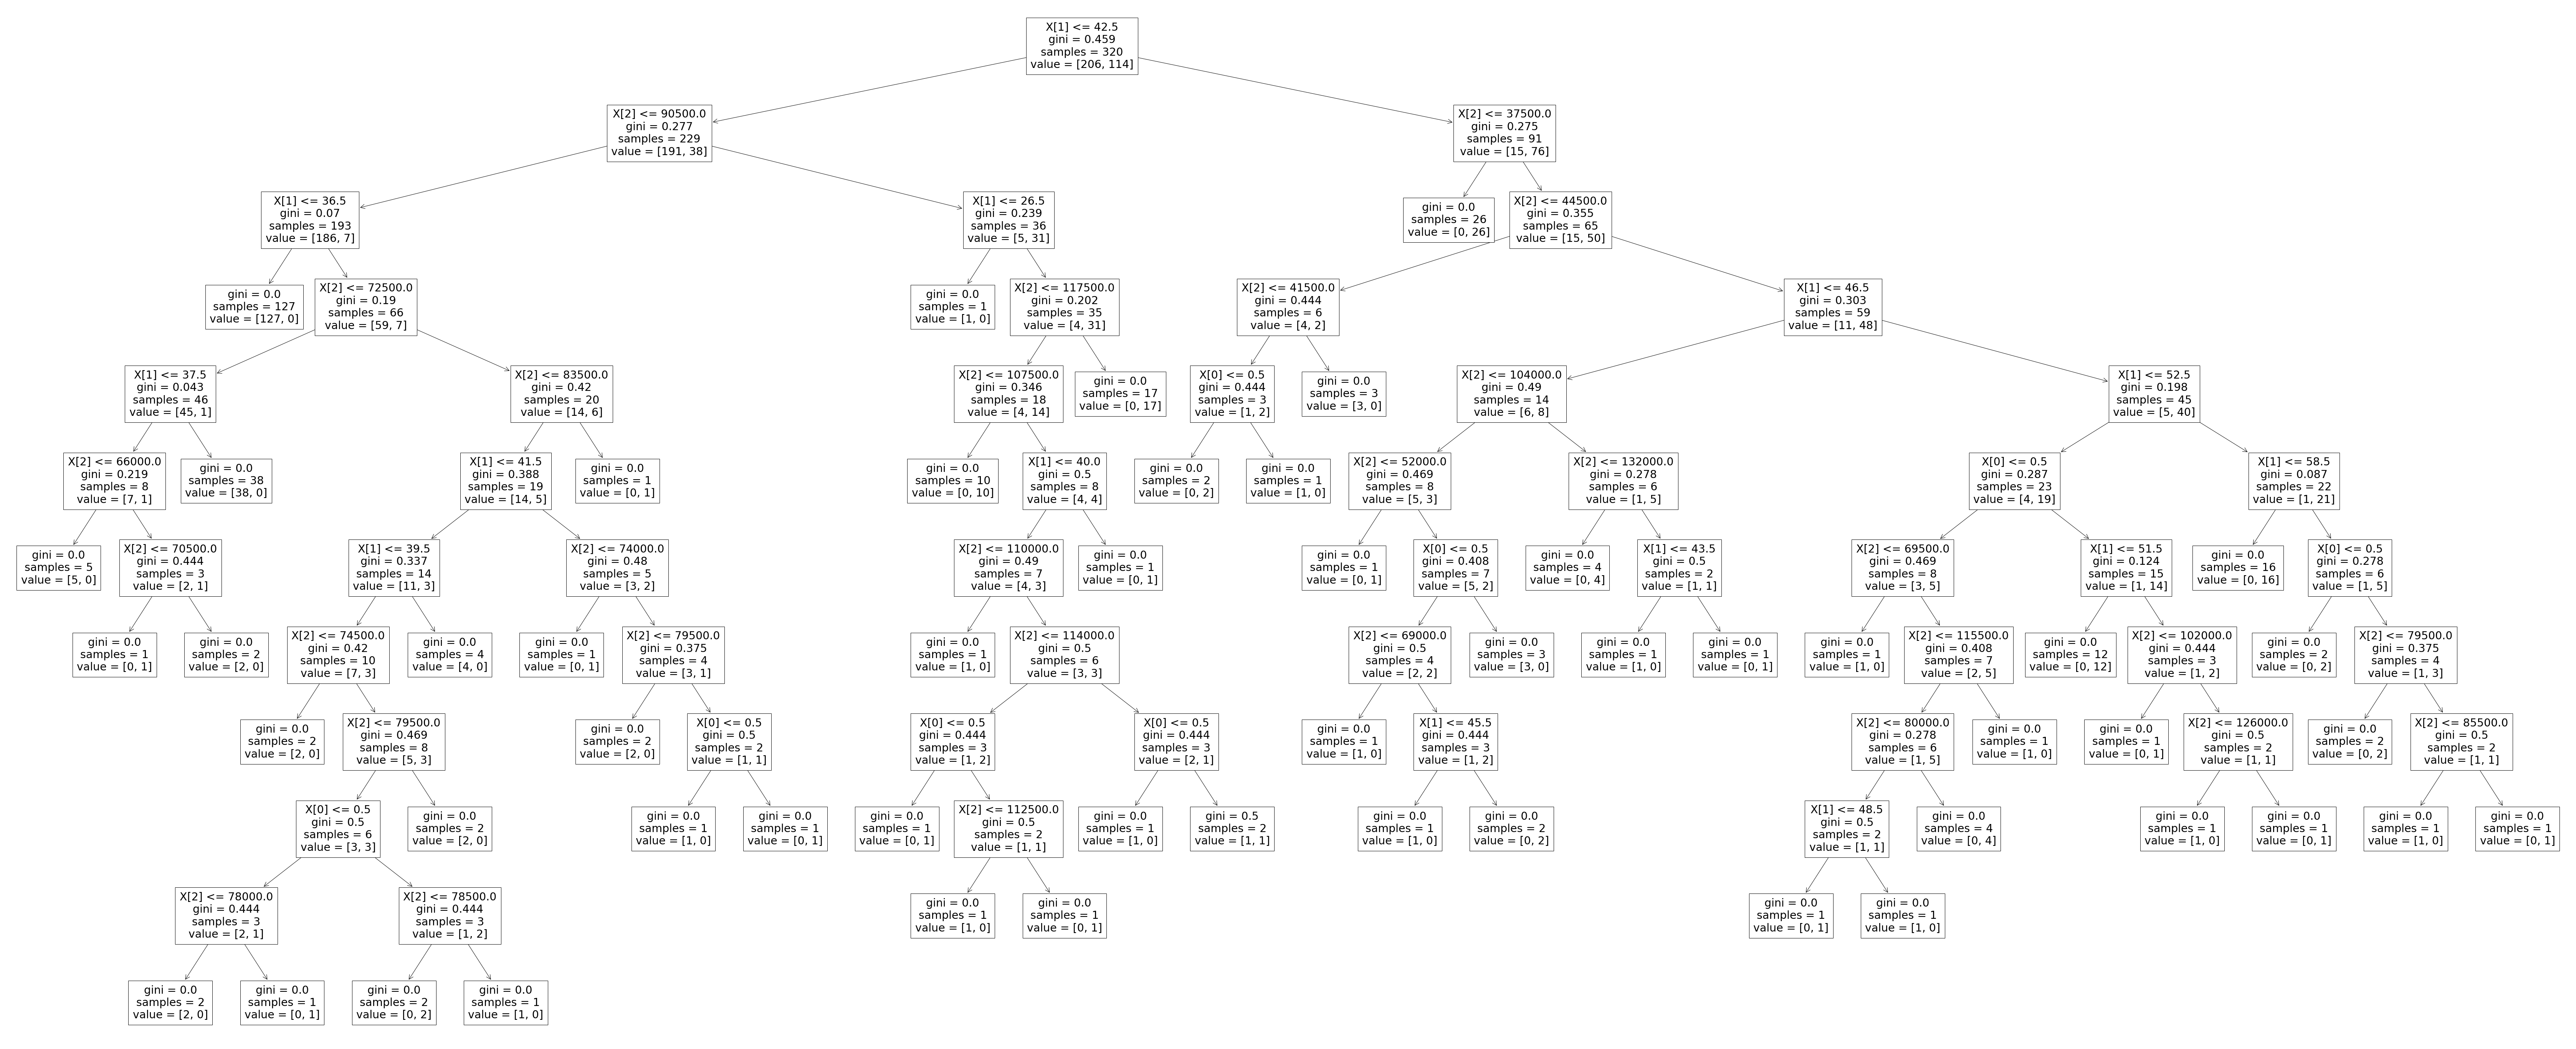

In [113]:
plot_tree(clf1)

* here, as we can see that the decision tree is very big and so over-fitting occurs. So to avoid this we give 'max_depth = 3' if we want 3 branches and so on.

In [114]:
clf2 = DecisionTreeClassifier(max_depth=3)

In [115]:
clf2.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[1] <= 42.5\ngini = 0.459\nsamples = 320\nvalue = [206, 114]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 90500.0\ngini = 0.277\nsamples = 229\nvalue = [191, 38]'),
 Text(0.16666666666666666, 0.375, 'X[1] <= 36.5\ngini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.25, 0.125, 'gini = 0.19\nsamples = 66\nvalue = [59, 7]'),
 Text(0.5, 0.375, 'X[1] <= 26.5\ngini = 0.239\nsamples = 36\nvalue = [5, 31]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(0.75, 0.625, 'X[2] <= 37500.0\ngini = 0.275\nsamples = 91\nvalue = [15, 76]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 44500.0\ngini = 0.355\nsamples = 65\nvalue = [15, 50]'),
 Text(0.75, 0.125, 'gini = 0.444\nsamples = 6\nvalue =

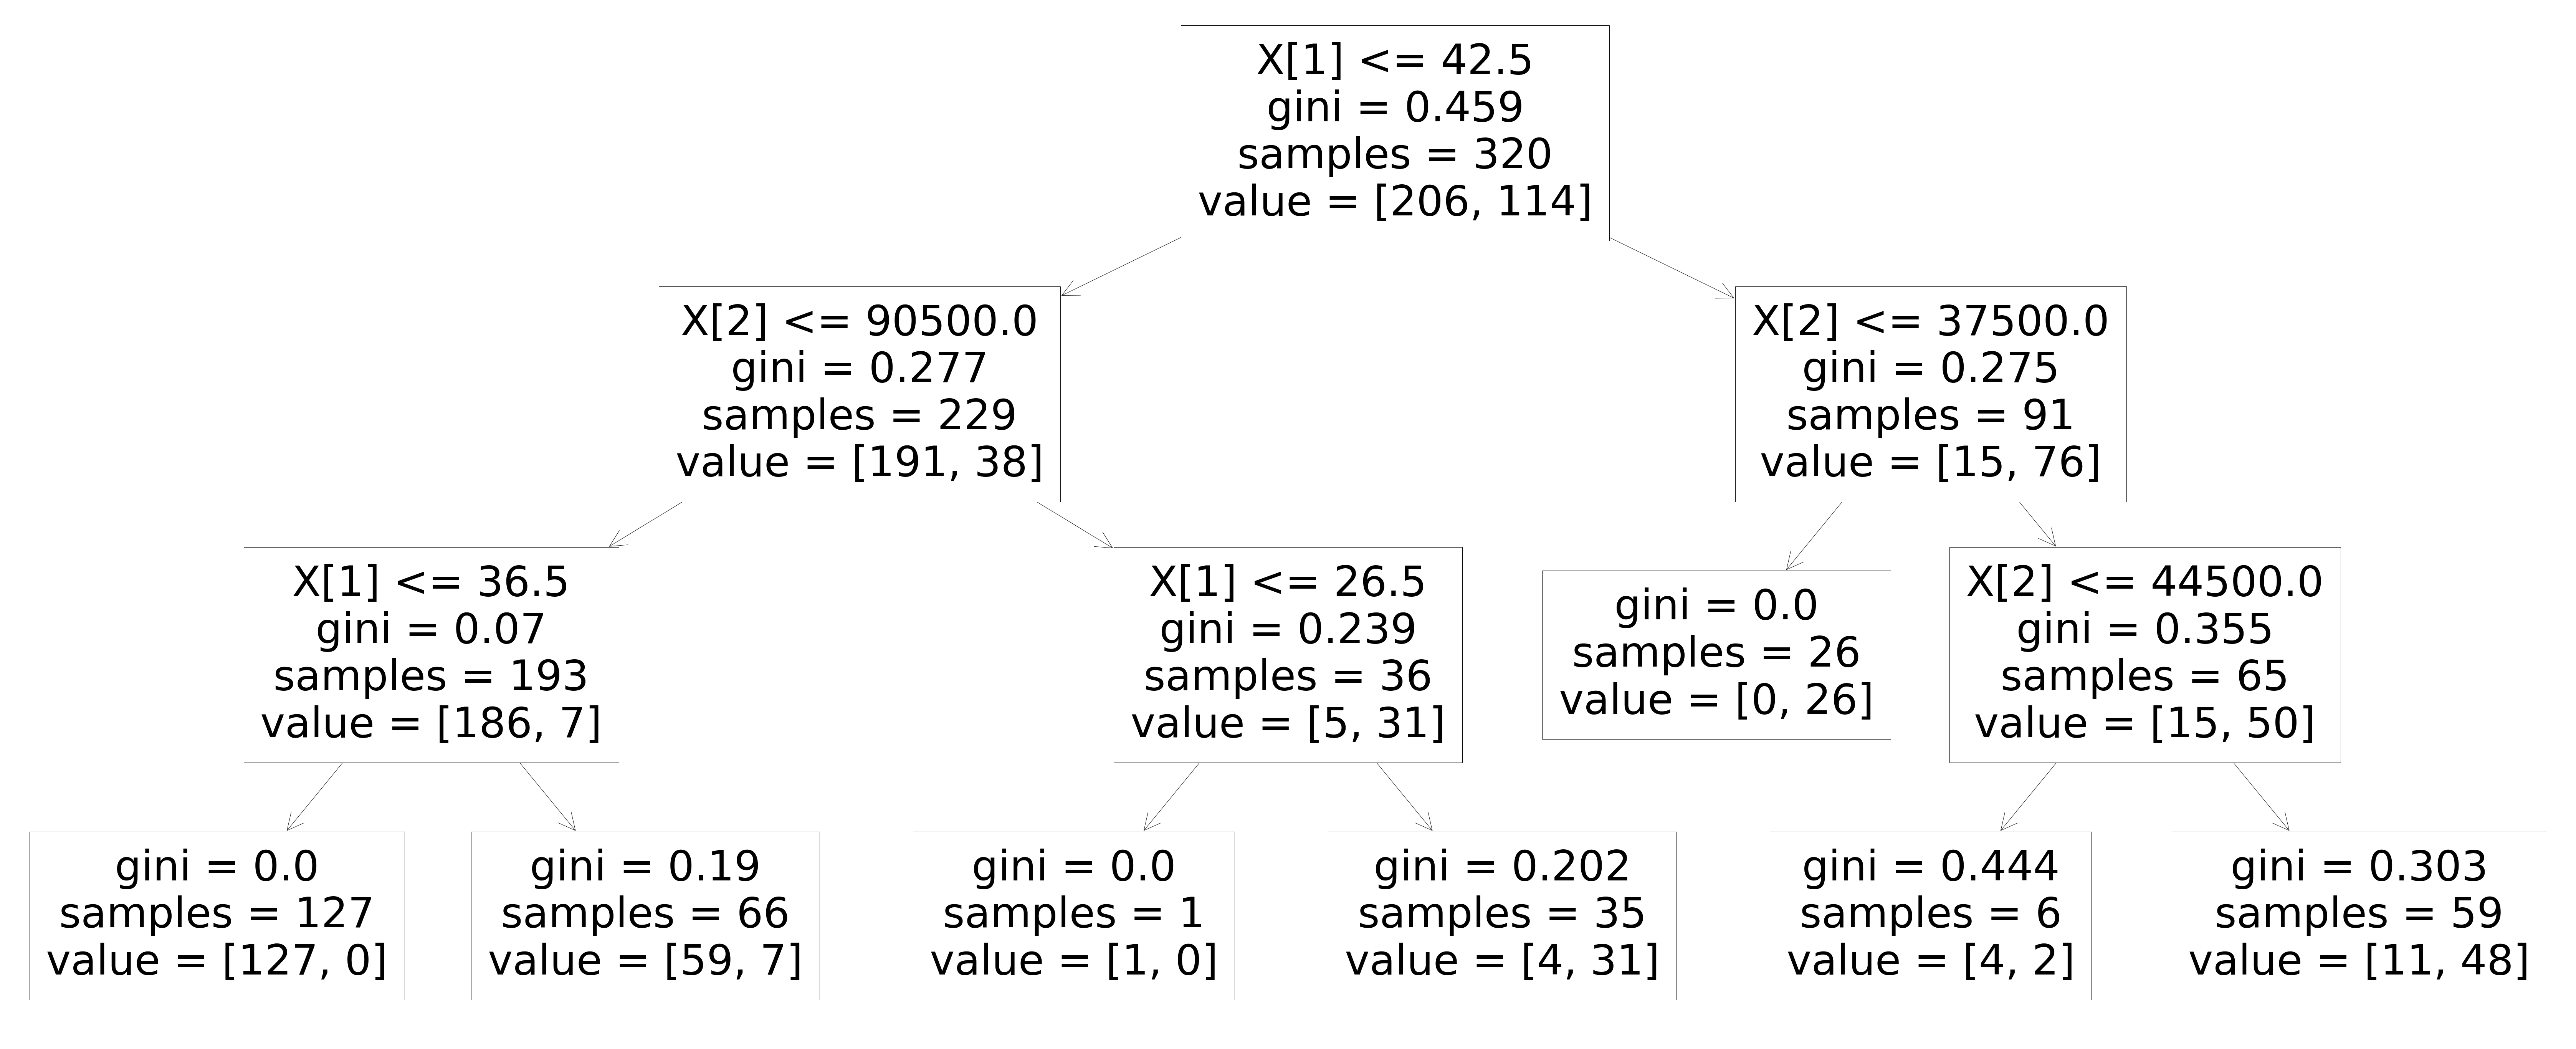

In [116]:
plot_tree(clf2)

In [117]:
def analyzer(max_depth):
    data = pd.read_csv("Social_Network_Ads.csv")
    X = data.iloc[:,2:4].values
    y = data.iloc[:,-1].values
    
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)
    
    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step = 0.1)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step = 100)
    
    XX, YY = np.meshgrid(a,b)
    
    input_array = np.array([XX.ravel(), YY.ravel()]).T
    
    labels = clf.predict(input_array)
    
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha = 0.5)
    plt.scatter (X[:,0], X[:,1] , c=y)

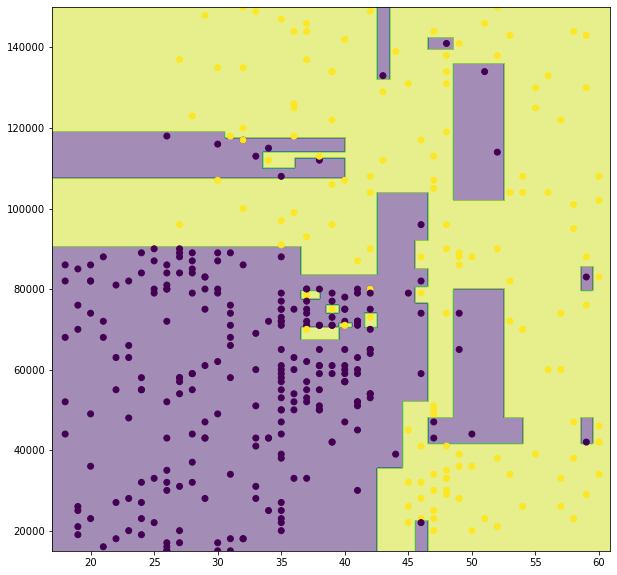

In [126]:
rcParams['figure.figsize'] = 10,10
analyzer(max_depth = None)

* here, we have assigned 'max_depth = None' which means it will go through all the branches and this lead to Over-fitting as show in the diagram above

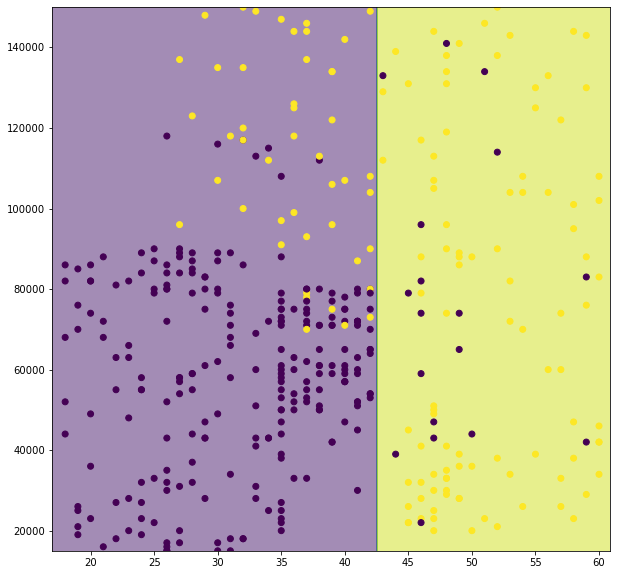

In [125]:
rcParams['figure.figsize'] = 10,10
analyzer(max_depth = 1)

* case of underfitting

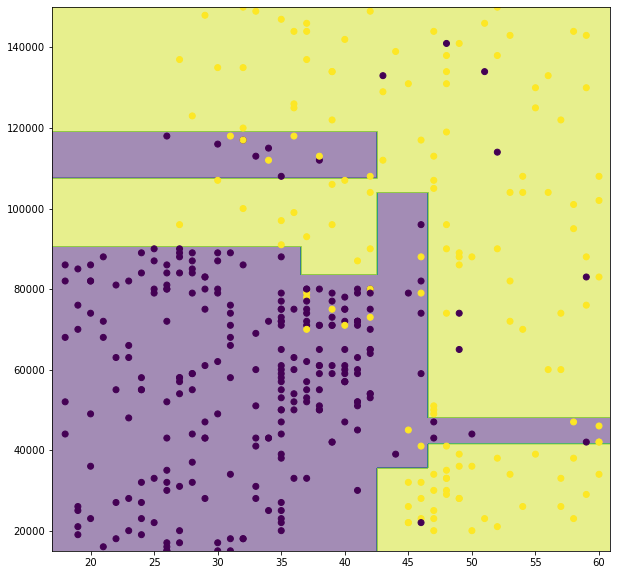

In [124]:
rcParams['figure.figsize'] = 10,10
analyzer(max_depth = 4)

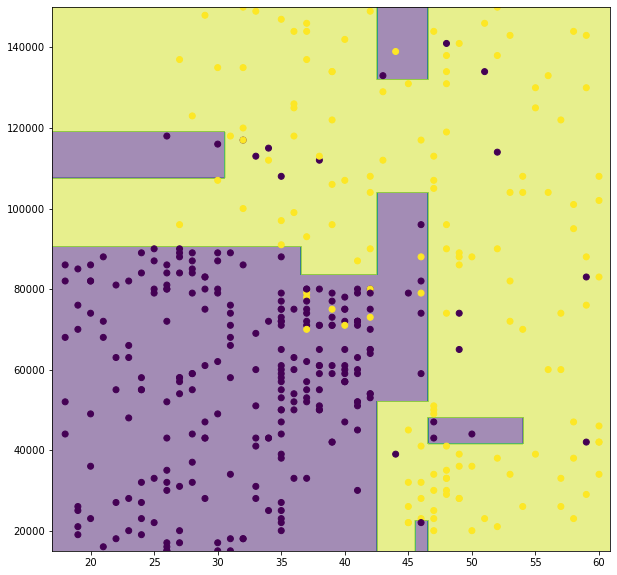

In [127]:
rcParams['figure.figsize'] = 10,10
analyzer(max_depth = 5)

* max_depth = 4,5 is a good depth of a tree as shown above

In [129]:
from matplotlib.pylab import rcParams

### Decision Tree Hyperparameters - 

* Decision tree has the drawback that the model may work very good on the training dataset but it may not give good results on the test data which is called as Overfitting. So to avoid this tuning is done.